In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# 1.	Load the data into python

In [2]:
#reading the data

df = pd.read_csv(r'Resume_Data.csv',encoding = 'unicode_escape')
df['Cleaned_Resume'] = ''
df.head()

,Category,Resume,Cleaned_Resume
0,NaN,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [3]:
print ("Resume Categories")
print (df['Category'].value_counts())

Resume Categories
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Mechanical Engineer          40
Sales                        40
Operations Manager           40
Data Science                 39
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


# 2.	Cleaning and preprocessing the resume text

In [4]:

import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

df['Cleaned_Resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [5]:
df.head()

,Category,Resume,Cleaned_Resume
0,NaN,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...


In [6]:
len(df)

962

# 3.	Performing the NLP tasks on the cleaned text

In [7]:
#getting the entire resume text

corpus=" "

for i in range(0,962):
    corpus= corpus+ df["Cleaned_Resume"][i]

In [8]:
corpus[1000:2500]

'review process and run analytics and generate reports Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain this tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review Understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data Worked on analyzing the outputs and precision monitoring for the entire tool TAR assists in predictive coding topic modelling from the evidence by following EY standards Developed the classifier models in order to identify red flags and fraud related issues Tools Technologies Python scikit learn tfidf word2vec doc2vec cosine similarity Na ve Bayes LDA NMF for topic modelling Vader and text blob for sentiment analysis Matplot lib Tableau dashboard for reporting MULTIPLE DATA SCIENCE AND ANAL

In [9]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

#Tokenizing the text
tokens = tokenizer.tokenize(corpus)

len(tokens)

411905

In [10]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [11]:
#import nltk
#nltk.download('stopwords')

In [12]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.

stopwords = nltk.corpus.stopwords.words('english')

words_new = []

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words:
    if word not in stopwords:
        words_new.append(word)

In [13]:
len(words_new)

318297

# Lemmatization

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
from nltk.stem import WordNetLemmatizer

wn = WordNetLemmatizer()

lem_words=[]

for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)


In [16]:
len(lem_words)

318297

In [17]:
same=0
diff=0

for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1

print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


# 4.	Find the frequency distribution of the words

In [18]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)

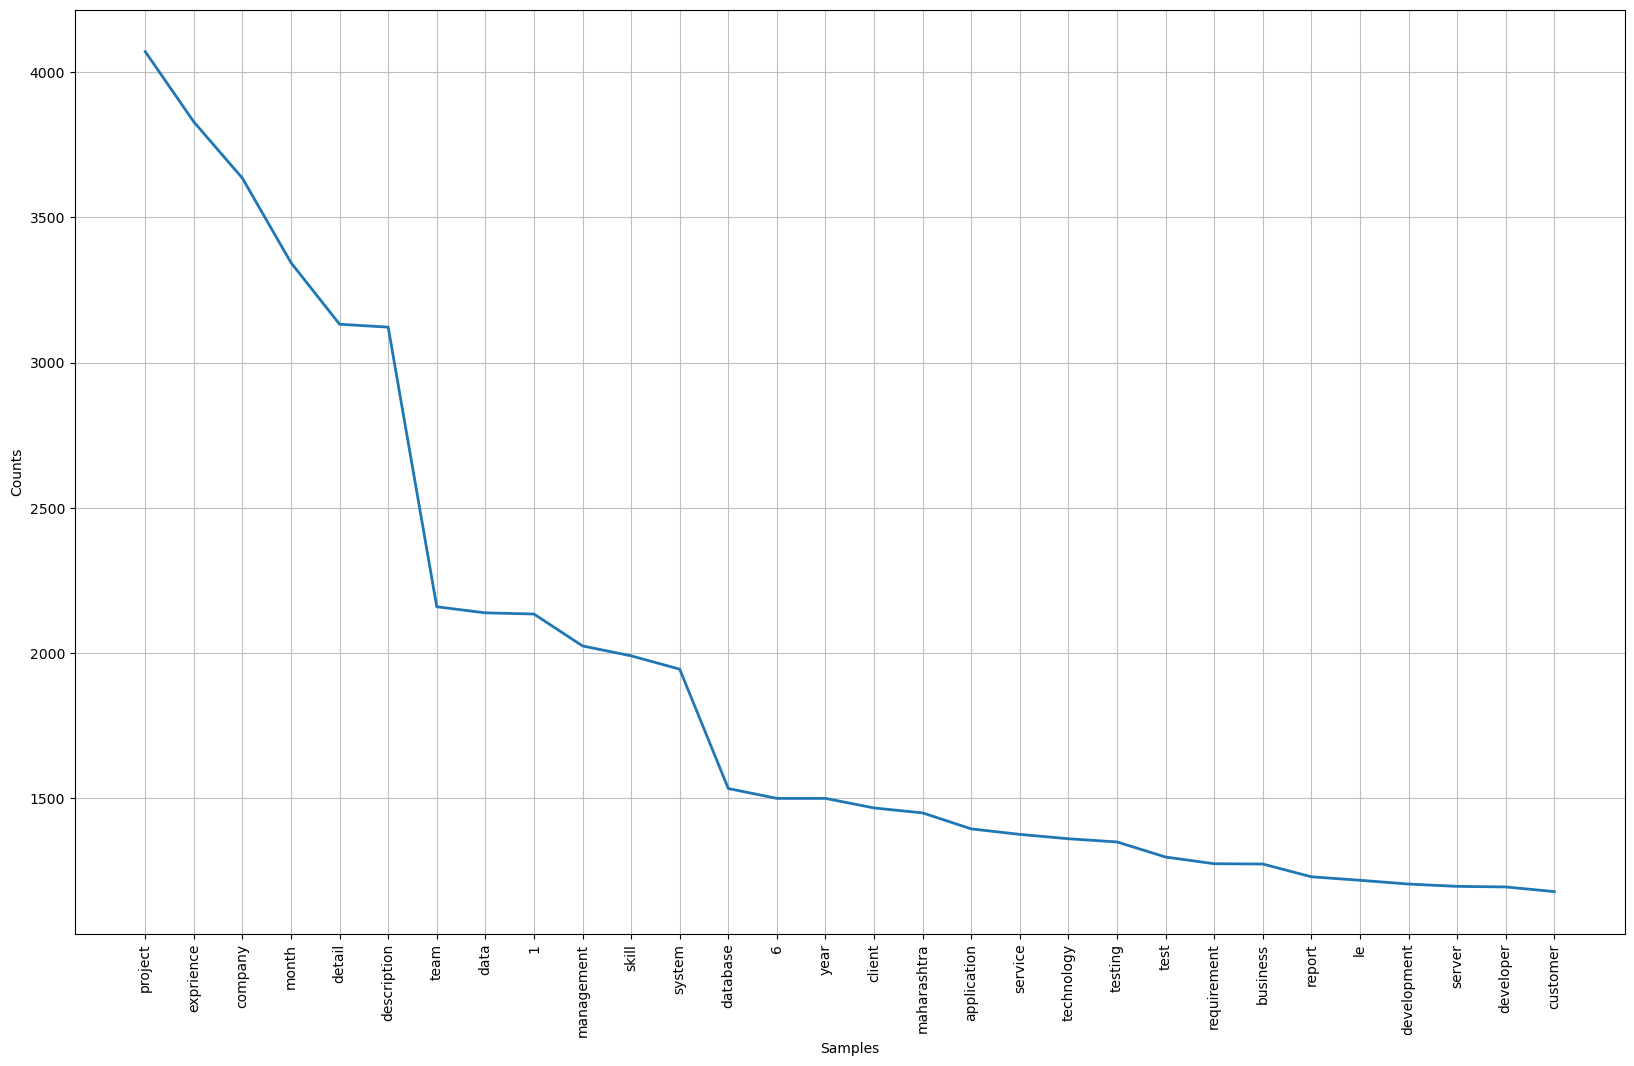

<Axes: xlabel='Samples', ylabel='Counts'>

In [19]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [20]:
len(freq_dist)

6769

In [21]:
mostcommon = freq_dist.most_common(50)

In [22]:
mostcommon

[('project', 4071),
 ('exprience', 3829),
 ('company', 3635),
 ('month', 3344),
 ('detail', 3132),
 ('description', 3122),
 ('team', 2159),
 ('data', 2138),
 ('1', 2134),
 ('management', 2024),
 ('skill', 1990),
 ('system', 1944),
 ('database', 1533),
 ('6', 1499),
 ('year', 1499),
 ('client', 1466),
 ('maharashtra', 1449),
 ('application', 1394),
 ('service', 1375),
 ('technology', 1360),
 ('testing', 1349),
 ('test', 1297),
 ('requirement', 1274),
 ('business', 1273),
 ('report', 1229),
 ('le', 1217),
 ('development', 1204),
 ('server', 1196),
 ('developer', 1194),
 ('customer', 1178),
 ('ltd', 1177),
 ('process', 1163),
 ('responsibility', 1137),
 ('using', 1124),
 ('sql', 1120),
 ('january', 1090),
 ('java', 1076),
 ('engineering', 1055),
 ('work', 1038),
 ('pune', 1026),
 ('role', 969),
 ('c', 951),
 ('user', 916),
 ('operation', 895),
 ('software', 886),
 ('pvt', 879),
 ('sale', 845),
 ('activity', 832),
 ('environment', 800),
 ('design', 786)]

# 5.	Building the word cloud with the corpus

In [23]:
wor = " ".join([i for i in lem_words if not i.isdigit()])

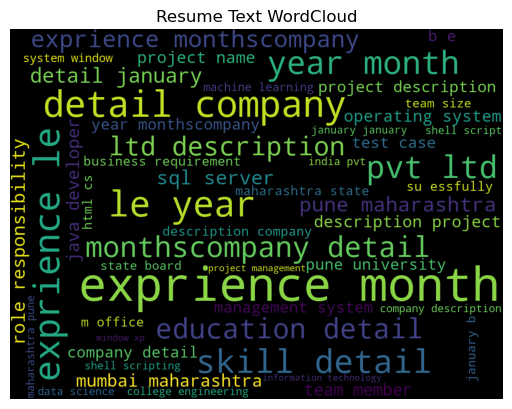

In [24]:
wordcloud = WordCloud(max_words= 50,
                      width= 1000,
                      height=750,
                      background_color="black"
                     ).generate(wor)
plt.title("Resume Text WordCloud")
plt.axis("off")
plt.imshow(wordcloud)

# 6.	Filter the resume data for a specific category of Data Science

In [25]:
temp = df[df["Category"]=="Data Science"]
temp.drop("Resume", axis=1)

,Category,Cleaned_Resume
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
5,Data Science,SKILLS C Basics IOT Python MATLAB Data Science...
6,Data Science,Skills Python Tableau Data Visualization R Stu...
7,Data Science,Education Details B Tech Rayat and Bahra Insti...
8,Data Science,Personal Skills Ability to quickly grasp techn...
9,Data Science,Expertise Data and Quantitative Analysis Decis...
10,Data Science,Skills Programming Languages Python pandas num...


In [26]:
print("total number of data science category resumes: ",len(temp.drop("Resume", axis=1)))

total number of data science category resumes:  39


# 7.	Create a corpus for data science resume text.

In [27]:
data_science_corpus = " "
for index, row in temp.iterrows():
    data_science_corpus = data_science_corpus + row["Cleaned_Resume"]

In [28]:
data_science_corpus

' Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github c

In [29]:
len(data_science_corpus)

115296

In [30]:
words_data_science= data_science_corpus.split()

In [31]:
len(words_data_science)

17056

In [32]:
words_data_science

['Education',
 'Details',
 'May',
 '2013',
 'to',
 'May',
 '2017',
 'B',
 'E',
 'UIT',
 'RGPV',
 'Data',
 'Scientist',
 'Data',
 'Scientist',
 'Matelabs',
 'Skill',
 'Details',
 'Python',
 'Exprience',
 'Less',
 'than',
 '1',
 'year',
 'months',
 'Statsmodels',
 'Exprience',
 '12',
 'months',
 'AWS',
 'Exprience',
 'Less',
 'than',
 '1',
 'year',
 'months',
 'Machine',
 'learning',
 'Exprience',
 'Less',
 'than',
 '1',
 'year',
 'months',
 'Sklearn',
 'Exprience',
 'Less',
 'than',
 '1',
 'year',
 'months',
 'Scipy',
 'Exprience',
 'Less',
 'than',
 '1',
 'year',
 'months',
 'Keras',
 'Exprience',
 'Less',
 'than',
 '1',
 'year',
 'monthsCompany',
 'Details',
 'company',
 'Matelabs',
 'description',
 'ML',
 'Platform',
 'for',
 'business',
 'professionals',
 'dummies',
 'and',
 'enthusiasts',
 '60',
 'A',
 'Koramangala',
 '5th',
 'block',
 'Achievements',
 'Tasks',
 'behind',
 'sukh',
 'sagar',
 'Bengaluru',
 'India',
 'Developed',
 'and',
 'deployed',
 'auto',
 'preprocessing',
 'step

# 8.	Find the frequencies of the important skills in Data science

In [33]:
print('Frequency of "python"  is :', words_data_science.count("python"))
print('Frequency of "analysis"  is :', words_data_science.count("analysis"))
print('Frequency of "pandas"  is :', words_data_science.count("pandas"))
print('Frequency of "data"  is :', words_data_science.count("data"))
print('Frequency of "visualization"  is :', words_data_science.count("visualization"))
print('Frequency of "excel"  is :', words_data_science.count("excel"))


Frequency of "python"  is : 16
Frequency of "analysis"  is : 43
Frequency of "pandas"  is : 3
Frequency of "data"  is : 165
Frequency of "visualization"  is : 8
Frequency of "excel"  is : 4
